In [1]:
from app import *

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.ipify.org:443
DEBUG:urllib3.connectionpool:https://api.ipify.org:443 "GET / HTTP/1.1" 200 14
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.gradio.app:443
DEBUG:urllib3.connectionpool:https://api.gradio.app:443 "POST /gradio-initiated-analytics/ HTTP/1.1" 200 31
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.gradio.app:443
DEBUG:urllib3.connectionpool:https://api.gradio.app:443 "POST /gradio-initiated-analytics/ HTTP/1.1" 200 31
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.gradio.app:443
DEBUG:urllib3.connectionpool:https://api.gradio.app:443 "GET /pkg-version HTTP/1.1" 200 20
DEBUG:asyncio:Using selector: KqueueSelector
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.ipify.org:443


Using cache from '/Users/ijanssen/videomatch/gradio_cached_examples/15' directory. If method or examples have changed since last caching, delete this folder to clear cache.


DEBUG:urllib3.connectionpool:https://api.ipify.org:443 "GET / HTTP/1.1" 200 14
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.gradio.app:443
DEBUG:urllib3.connectionpool:https://api.gradio.app:443 "POST /gradio-initiated-analytics/ HTTP/1.1" 200 31
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.gradio.app:443
DEBUG:urllib3.connectionpool:https://api.gradio.app:443 "POST /gradio-initiated-analytics/ HTTP/1.1" 200 31
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.gradio.app:443
DEBUG:urllib3.connectionpool:https://api.gradio.app:443 "GET /pkg-version HTTP/1.1" 200 20
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.ipify.org:443
DEBUG:urllib3.connectionpool:https://api.ipify.org:443 "GET / HTTP/1.1" 200 14
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.gradio.app:443
DEBUG:urllib3.connectionpool:https://api.gradio.app:443 "POST /gradio-initiated-analytics/ HTTP/1.1" 200 31


In [170]:
target = video_urls[-1:] # (Plenaire Zaal) Long video
url = video_urls[1] # (0: Ploumen) (1: Bram) (2: Baudet) Short video which is a (maybe mixed up) subset of the soure video
  

# Source
video_index = index_hashes_for_video(url)
video_index.make_direct_map()
# video_index.ntotal # Total number of frames for the video, after changing its FPS to 5 
hash_vectors = np.array([video_index.reconstruct(i) for i in range(video_index.ntotal)])

# Target
target_indices = [index_hashes_for_video(x) for x in [target][0]]


INFO:root:Skipping downloading from https://www.dropbox.com/s/rzmicviu1fe740t/Bram%20van%20Ojik%20krijgt%20reprimande.mp4?dl=1 because /var/folders/hy/qkxzx5jj0hvcj_l_lpvn81sc0000gp/T/e295c0e13c21aa3e971921627e8c8b1a already exists.
INFO:root:Loading indexed hashes from /var/folders/hy/qkxzx5jj0hvcj_l_lpvn81sc0000gp/T/e295c0e13c21aa3e971921627e8c8b1a.index
INFO:root:Index /var/folders/hy/qkxzx5jj0hvcj_l_lpvn81sc0000gp/T/e295c0e13c21aa3e971921627e8c8b1a.index has in total 182 frames
INFO:root:Skipping downloading from https://www.dropbox.com/s/4ognq8lshcujk43/Plenaire_zaal_20200923132426_Omtzigt.mp4?dl=1 because /var/folders/hy/qkxzx5jj0hvcj_l_lpvn81sc0000gp/T/95fc56d68e602bc591942581d1c98114 already exists.
INFO:root:Loading indexed hashes from /var/folders/hy/qkxzx5jj0hvcj_l_lpvn81sc0000gp/T/95fc56d68e602bc591942581d1c98114.index
INFO:root:Index /var/folders/hy/qkxzx5jj0hvcj_l_lpvn81sc0000gp/T/95fc56d68e602bc591942581d1c98114.index has in total 7471 frames


INFO:root:Skipping downloading from https://www.dropbox.com/s/rzmicviu1fe740t/Bram%20van%20Ojik%20krijgt%20reprimande.mp4?dl=1 because /var/folders/hy/qkxzx5jj0hvcj_l_lpvn81sc0000gp/T/e295c0e13c21aa3e971921627e8c8b1a already exists.
INFO:root:Loading indexed hashes from /var/folders/hy/qkxzx5jj0hvcj_l_lpvn81sc0000gp/T/e295c0e13c21aa3e971921627e8c8b1a.index
INFO:root:Index /var/folders/hy/qkxzx5jj0hvcj_l_lpvn81sc0000gp/T/e295c0e13c21aa3e971921627e8c8b1a.index has in total 182 frames
INFO:root:Skipping downloading from https://www.dropbox.com/s/4ognq8lshcujk43/Plenaire_zaal_20200923132426_Omtzigt.mp4?dl=1 because /var/folders/hy/qkxzx5jj0hvcj_l_lpvn81sc0000gp/T/95fc56d68e602bc591942581d1c98114 already exists.
INFO:root:Loading indexed hashes from /var/folders/hy/qkxzx5jj0hvcj_l_lpvn81sc0000gp/T/95fc56d68e602bc591942581d1c98114.index
INFO:root:Index /var/folders/hy/qkxzx5jj0hvcj_l_lpvn81sc0000gp/T/95fc56d68e602bc591942581d1c98114.index has in total 7471 frames


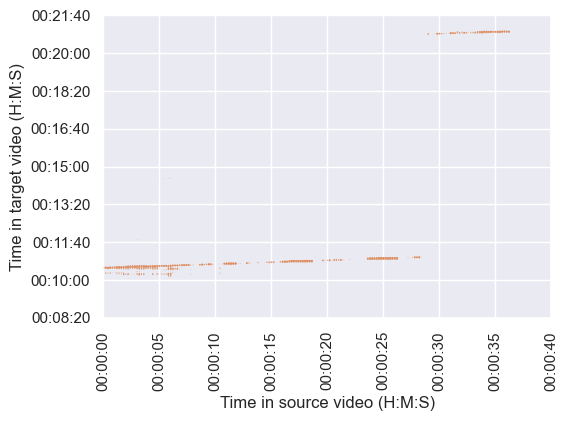

In [171]:
x = compare_videos(url, target[0], MIN_DISTANCE=10)

In [172]:
MIN_DISTANCE = 10

# Url (short video) 
video_index = index_hashes_for_video(url)
video_index.make_direct_map() # Make sure the index is indexable
hash_vectors = np.array([video_index.reconstruct(i) for i in range(video_index.ntotal)]) # Retrieve original indices

# Target video (long video)
target_indices = [index_hashes_for_video(x) for x in [target][0]]

# The results are returned as a triplet of 1D arrays 
# lims, D, I, where result for query i is in I[lims[i]:lims[i+1]] 
# (indices of neighbors), D[lims[i]:lims[i+1]] (distances).
lims, D, I = target_indices[0].range_search(hash_vectors, MIN_DISTANCE)

INFO:root:Skipping downloading from https://www.dropbox.com/s/rzmicviu1fe740t/Bram%20van%20Ojik%20krijgt%20reprimande.mp4?dl=1 because /var/folders/hy/qkxzx5jj0hvcj_l_lpvn81sc0000gp/T/e295c0e13c21aa3e971921627e8c8b1a already exists.
INFO:root:Loading indexed hashes from /var/folders/hy/qkxzx5jj0hvcj_l_lpvn81sc0000gp/T/e295c0e13c21aa3e971921627e8c8b1a.index
INFO:root:Index /var/folders/hy/qkxzx5jj0hvcj_l_lpvn81sc0000gp/T/e295c0e13c21aa3e971921627e8c8b1a.index has in total 182 frames
INFO:root:Skipping downloading from https://www.dropbox.com/s/4ognq8lshcujk43/Plenaire_zaal_20200923132426_Omtzigt.mp4?dl=1 because /var/folders/hy/qkxzx5jj0hvcj_l_lpvn81sc0000gp/T/95fc56d68e602bc591942581d1c98114 already exists.
INFO:root:Loading indexed hashes from /var/folders/hy/qkxzx5jj0hvcj_l_lpvn81sc0000gp/T/95fc56d68e602bc591942581d1c98114.index
INFO:root:Index /var/folders/hy/qkxzx5jj0hvcj_l_lpvn81sc0000gp/T/95fc56d68e602bc591942581d1c98114.index has in total 7471 frames


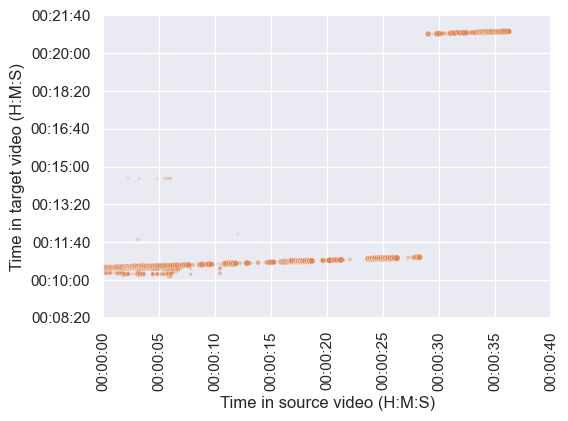

In [173]:
def plot_comparison(lims, D, I, hash_vectors, MIN_DISTANCE = 3):
    sns.set_theme()

    x = [(lims[i+1]-lims[i]) * [i] for i in range(hash_vectors.shape[0])]
    x = [i/FPS for j in x for i in j]
    y = [i/FPS for i in I]
    
    # Create figure and dataframe to plot with sns
    fig = plt.figure()
    # plt.tight_layout()
    df = pd.DataFrame(zip(x, y), columns = ['X', 'Y'])
    g = sns.scatterplot(data=df, x='X', y='Y', s=20*(1-(D/(MIN_DISTANCE+1))), alpha=1-D/MIN_DISTANCE)

    # Set x-labels to be more readable
    x_locs, x_labels = plt.xticks() # Get original locations and labels for x ticks
    x_labels = [time.strftime('%H:%M:%S', time.gmtime(x)) for x in x_locs]
    plt.xticks(x_locs, x_labels)
    plt.xticks(rotation=90)
    plt.xlabel('Time in source video (H:M:S)')
    plt.xlim(0, None)

    # Set y-labels to be more readable
    y_locs, y_labels = plt.yticks() # Get original locations and labels for x ticks
    y_labels = [time.strftime('%H:%M:%S', time.gmtime(y)) for y in y_locs]
    plt.yticks(y_locs, y_labels)
    plt.ylabel('Time in target video (H:M:S)')

    # Adjust padding to fit gradio
    plt.subplots_adjust(bottom=0.25, left=0.20)
    return fig 

_ = plot_comparison(lims, D, I, hash_vectors, MIN_DISTANCE = MIN_DISTANCE)

In [174]:
x = [(lims[i+1]-lims[i]) * [i] for i in range(hash_vectors.shape[0])]
x = [i/FPS for j in x for i in j]
y = [i/FPS for i in I]


df = pd.DataFrame(zip(x, y), columns = ['X', 'Y'])
df['X_WEIGHT'] = 1 - D/MIN_DISTANCE # Higher value means a better match
df

,X,Y,X_WEIGHT
0,0.0,614.8,0.2
1,0.0,630.4,0.6
2,0.0,631.0,0.4
3,0.0,631.8,0.2
4,0.0,632.0,0.2
...,...,...,...
1806,36.2,1256.8,0.4
1807,36.2,1257.0,0.4
1808,36.2,1257.2,0.4
1809,36.2,1257.4,0.6


In [175]:
# Multiply the weight (which indicates a better match) with the value for Y
# and aggregate to get a less noisy estimate of Y
df['Y_WEIGHTED_VALUE'] = df['Y'] * df['X_WEIGHT'] 

# Group by X so for every second/x there will be 1 value of Y in the end
grouped_X = df.groupby('X').agg({'Y_WEIGHTED_VALUE' : 'sum', 'X_WEIGHT' : 'sum'})
grouped_X['FINAL_Y_VALUE'] = grouped_X['Y_WEIGHTED_VALUE'] / grouped_X['X_WEIGHT'] 

# Remake the dataframe
df_cleaned = grouped_X.reset_index()
df_cleaned = df_cleaned.drop(columns=['Y_WEIGHTED_VALUE', 'X_WEIGHT'])
df_cleaned = df_cleaned.rename({'FINAL_Y_VALUE' : 'Y'}, axis='columns')
df = df_cleaned
df

,X,Y
0,0.0,632.864711
1,0.2,628.870286
2,0.4,630.206667
3,0.6,629.586347
4,0.8,632.092322
...,...,...
146,35.4,1256.155524
147,35.6,1256.695256
148,35.8,1256.545523
149,36.0,1256.582592


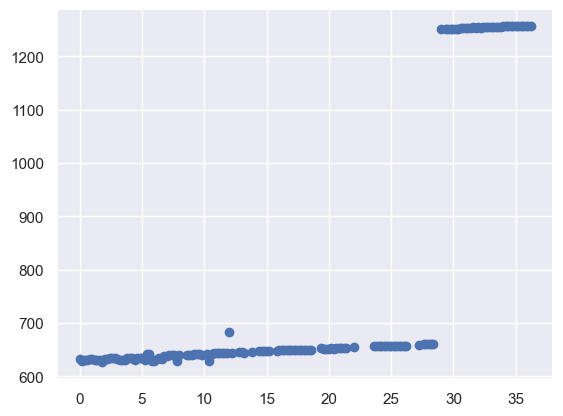

In [176]:
plt.scatter(x=df['X'], y = df['Y'])

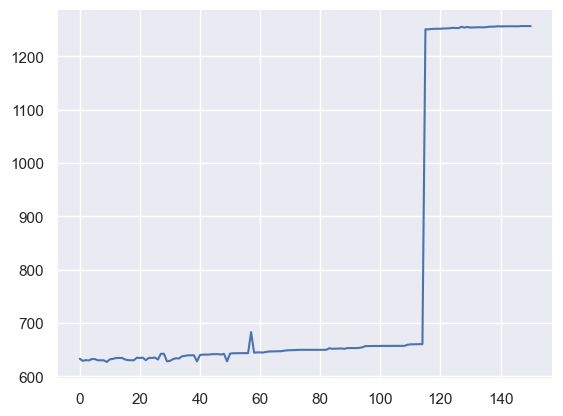

In [177]:
plt.plot(df['Y'])

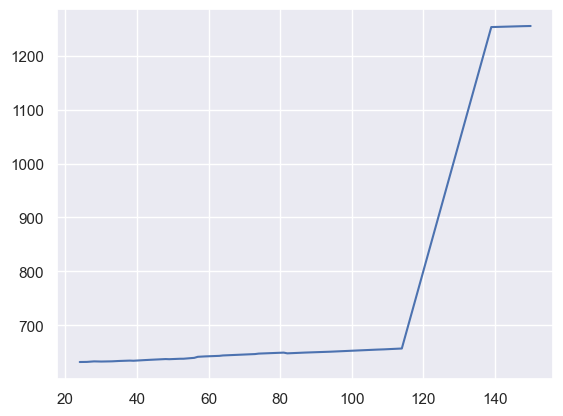

In [178]:
WINDOW_SIZE = 25
df['Rolling_Y'] = df['Y'].rolling(WINDOW_SIZE).mean()
plt.plot(df['Rolling_Y'])

Text(0.5, 0, 'Time of source video in seconds')

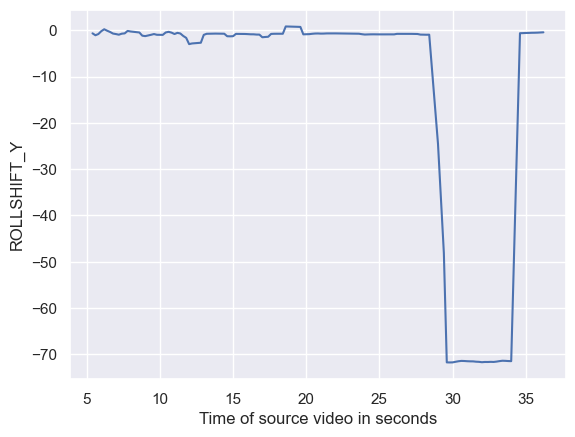

In [179]:
df['ROLLSHIFT_Y'] = df['Y'].rolling(WINDOW_SIZE).mean().shift(3) - df['Y'].rolling(WINDOW_SIZE).mean()
sns.lineplot(data = df, x='X', y='ROLLSHIFT_Y')
plt.xlabel('Time of source video in seconds')

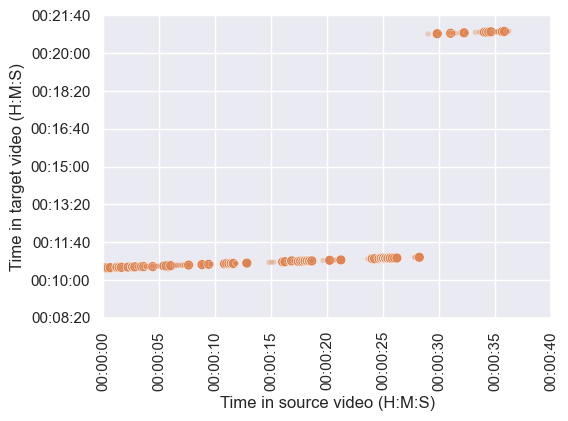

In [18]:
def plot_comparison(lims, D, I, hash_vectors, MIN_DISTANCE = 3):
    sns.set_theme()

    x = [(lims[i+1]-lims[i]) * [i] for i in range(hash_vectors.shape[0])]
    x = [i/FPS for j in x for i in j]
    y = [i/FPS for i in I]
    
    # Create figure and dataframe to plot with sns
    fig = plt.figure()
    # plt.tight_layout()
    df = pd.DataFrame(zip(x, y), columns = ['X', 'Y'])
    g = sns.scatterplot(data=df, x='X', y='Y', s=50*(1-D/MIN_DISTANCE), alpha=1-D/MIN_DISTANCE)

    # Set x-labels to be more readable
    x_locs, x_labels = plt.xticks() # Get original locations and labels for x ticks
    x_labels = [time.strftime('%H:%M:%S', time.gmtime(x)) for x in x_locs]
    plt.xticks(x_locs, x_labels)
    plt.xticks(rotation=90)
    plt.xlabel('Time in source video (H:M:S)')
    plt.xlim(0, None)

    # Set y-labels to be more readable
    y_locs, y_labels = plt.yticks() # Get original locations and labels for x ticks
    y_labels = [time.strftime('%H:%M:%S', time.gmtime(y)) for y in y_locs]
    plt.yticks(y_locs, y_labels)
    plt.ylabel('Time in target video (H:M:S)')

    # Adjust padding to fit gradio
    plt.subplots_adjust(bottom=0.25, left=0.20)
    return fig 

x = plot_comparison(lims, D, I, hash_vectors, MIN_DISTANCE = 3)